# Extra Tree

### Set initial settings

In [1]:
import sys
import warnings

# Add base directory in path
sys.path.append('../../')

# Ignore future warning
warnings.filterwarnings("ignore", category=FutureWarning)

### Import libs

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
from src.ml import experiment
from src.plot import plot_by_feature_selection_method

### Load original data

In [3]:
# Set a random seed
np.random.seed(7)

# Read the dataset
dataset = pd.read_csv("../../data/df_original_100000.csv")

# Extract the labels
y = np.array(dataset["Label"])
del dataset["Label"]

# Define X (Features)
X = np.array(dataset)

print(f"Shape Features (X): {X.shape}")
print(f"Shape Target (y): {y.shape}")

result = []

Shape Features (X): (100000, 79)
Shape Target (y): (100000,)


### Feature Selection

In [4]:
k_best = 6

extra_tree_model = ExtraTreesClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    max_features=k_best
)
extra_tree_model.fit(X, y)

feature_selector = SelectFromModel(extra_tree_model)
X_selected = feature_selector.fit_transform(X, y)

print(f"Original Features Shape: {X.shape}")
print(f"New Feature Shape: {X_selected.shape}")

Original Features Shape: (100000, 79)
New Feature Shape: (100000, 20)


### Train models

In [5]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), 
    "DecisionTree": DecisionTreeClassifier(), 
    "RandomForest":RandomForestClassifier(), 
    "GaussianNB":GaussianNB(var_smoothing=1e-02)
}

In [6]:
final_result = experiment(models=models, X=X_selected, y=y)

KNN Trained
DecisionTree Trained
RandomForest Trained
GaussianNB Trained


### Print and save result file

In [7]:
final_result.to_csv(f"./extra_tree_{k_best}_result.csv", index=False)
final_result

,model,anonymized train,anonymized test,accuracy,precision,recall,f1_score
0,KNN,True,True,83.871%,78.861%,97.972%,86.716%
1,KNN,True,False,78.873%,73.631%,94.714%,82.346%
2,KNN,False,True,83.975%,81.037%,95.036%,86.627%
3,KNN,False,False,99.999%,100.000%,99.998%,99.999%
4,DecisionTree,True,True,70.039%,69.289%,81.806%,73.400%
5,DecisionTree,True,False,62.551%,80.313%,56.180%,60.385%
6,DecisionTree,False,True,77.000%,70.404%,93.166%,80.200%
7,DecisionTree,False,False,100.000%,100.000%,100.000%,100.000%
8,RandomForest,True,True,70.192%,70.808%,71.027%,69.361%
9,RandomForest,True,False,78.109%,70.335%,98.076%,81.836%


### Result Plots

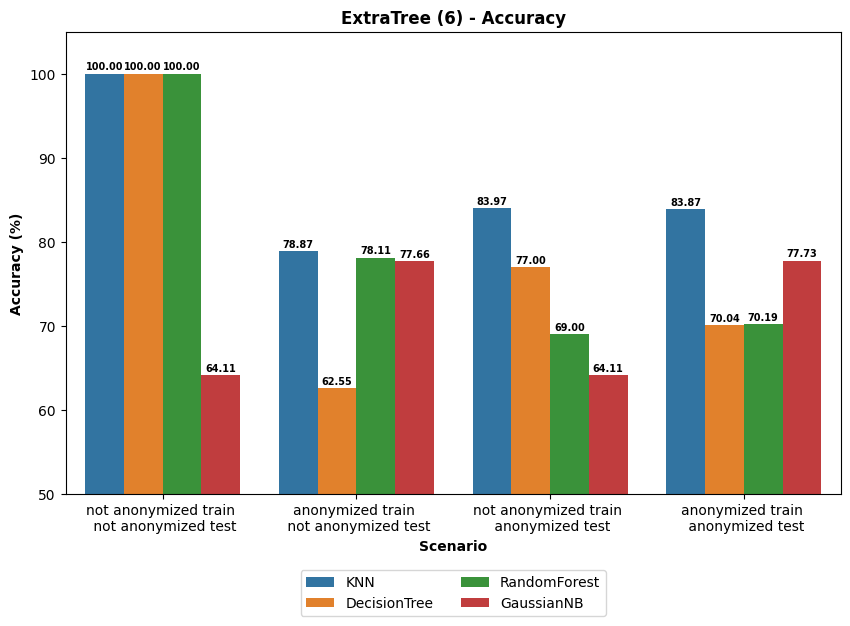

In [8]:
plot_by_feature_selection_method(title=f"ExtraTree ({k_best}) - Accuracy", metric_name="accuracy", dataframe_file_path=f"./extra_tree_{k_best}_result.csv", plot_path=f"./extra_tree_{k_best}_accuracy.png", y_lim_bottom=50)

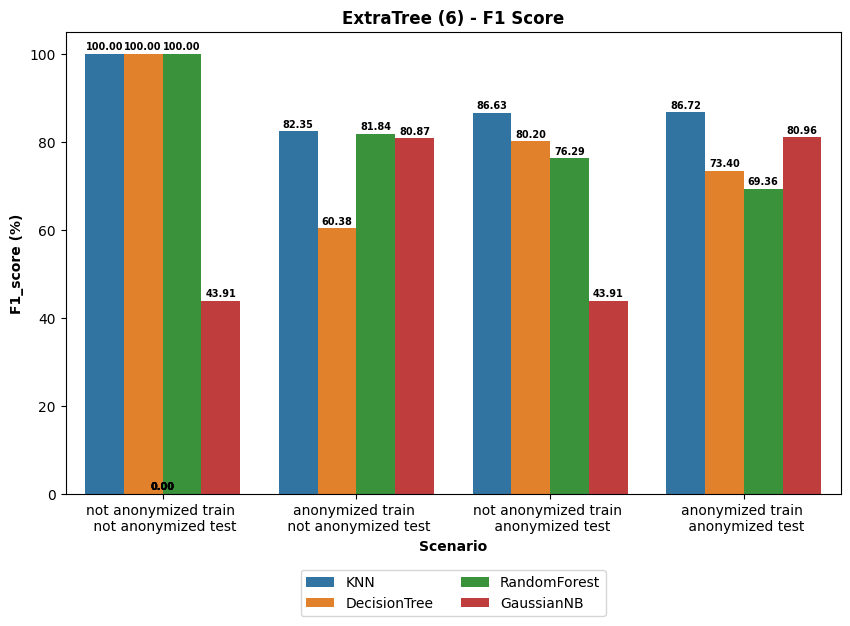

In [9]:
plot_by_feature_selection_method(title=f"ExtraTree ({k_best}) - F1 Score", metric_name="f1_score", dataframe_file_path=f"./extra_tree_{k_best}_result.csv", plot_path=f"./extra_tree_{k_best}_f1_score.png")